# WILDFIRES IN LIGURIA DATASET: ADVANCED APPROACH

In this Jupyter Notebook, we will go through two a spatial analysis of a dataset regarding  fires in  Liguria region. 

- First phrase
- Second phrase

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
#load the data and  craete a PANDAS dataframe
#this is the geographical dataset... let us have  a closer look.
geog = pd.read_csv("./data_ML/points_simple.csv")

geog.head()



point_index  point_index.1  row   col           x          y      dem  \
0            0              0   29  1159  1494778.27  4946884.1  542.510   
1            1              1   29  1160  1494878.27  4946884.1  541.200   
2            2              2   29  1161  1494978.27  4946884.1  536.908   
3            3              3   29  1162  1495078.27  4946884.1  541.393   
4            4              4   29  1176  1496478.27  4946884.1  663.182   

       slope     north      east         veg  veg_agg    veg_type     urban_d  \
0  24.257362 -0.999291  0.037648    OSTRIETO     34.0    Ostrieto   707.10680   
1  22.235560 -0.999577  0.029074    OSTRIETO     34.0    Ostrieto   781.02496   
2  18.345531 -0.997772 -0.066717    OSTRIETO     34.0    Ostrieto   848.52810   
3  16.085570 -0.966531 -0.256548    OSTRIETO     34.0    Ostrieto   900.00000   
4  20.942606 -0.898197  0.439593  CASTAGNETI     35.0  Castagneto  1552.41750   

      roads_d     crops_d  park   tracks_d  
0  1000.00000   806.22577   0.0  5738.4670  
1  1000.00000   800.00000   0.0  5672.7417  
2  1000.00000   800.00000   0.0  5608.0300  
3  1004.98755   806.22577   0.0  5544.3660  
4  1300.00000  1421.26710   0.0  4750.7890

In [2]:
mm = (geog["x"].max() - geog["x"].min())*0.5 + geog["x"].min()
geog = geog[geog.x < mm]

mm = (geog["x"].max() - geog["x"].min())*0.5 + geog["x"].min()
geog = geog[geog.x < mm]



In [3]:
geog["veg_agg"].value_counts()

34.0     41575
37.0     22942
23.0     16451
35.0     15677
333.0    12523
32.0     11383
21.0      7868
22.0      4509
Name: veg_agg, dtype: int64

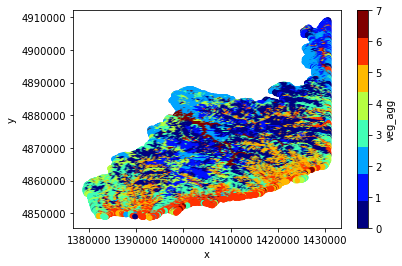

In [4]:
mapping = {34.0: 0, 35.0: 1, 333.0 : 2, 37.0: 3, 32.0 : 4, 23.0 : 5, 21.0 : 6, 22.0 : 7}
geog = geog.replace({"veg_agg": mapping})

cmap = plt.get_cmap('jet', 8)
geog.plot.scatter("x","y", cmap = cmap, c = "veg_agg")


In [5]:
geog["veg_agg"].value_counts()

0.0    41575
3.0    22942
5.0    16451
1.0    15677
2.0    12523
4.0    11383
6.0     7868
7.0     4509
Name: veg_agg, dtype: int64

In [6]:
print(geog.columns)
print(".............................")
print(".............................")
print(".............................")

print(geog.info())

Index(['point_index', 'point_index.1', 'row', 'col', 'x', 'y', 'dem', 'slope',
       'north', 'east', 'veg', 'veg_agg', 'veg_type', 'urban_d', 'roads_d',
       'crops_d', 'park', 'tracks_d'],
      dtype='object')
.............................
.............................
.............................
<class 'pandas.core.frame.DataFrame'>
Int64Index: 132928 entries, 227053 to 492277
Data columns (total 18 columns):
point_index      132928 non-null int64
point_index.1    132928 non-null int64
row              132928 non-null int64
col              132928 non-null int64
x                132928 non-null float64
y                132928 non-null float64
dem              132928 non-null float64
slope            132928 non-null float64
north            132928 non-null float64
east             132928 non-null float64
veg              132928 non-null object
veg_agg          132928 non-null float64
veg_type         132928 non-null object
urban_d          132928 non-null float64
roads_d       

In [7]:
geog = geog.drop(["point_index.1", "row","col","north","east","veg","veg_type"], axis = 1)

In [8]:
geog.head()

point_index           x          y      dem      slope  veg_agg  \
227053       227053  1430378.27  4909084.1  855.077  12.836075      0.0   
227054       227054  1430478.27  4909084.1  826.031  11.479017      0.0   
227055       227055  1430578.27  4909084.1  810.000   9.201300      0.0   
227056       227056  1430678.27  4909084.1  824.728  11.558707      0.0   
227714       227714  1430178.27  4908984.1  904.998  13.343577      1.0   

          urban_d    roads_d    crops_d  park   tracks_d  
227053  2137.7559  2137.7559  2061.5527   1.0  3106.4448  
227054  2121.3203  2121.3203  2061.5527   1.0  3006.6594  
227055  2109.5022  2109.5022  2039.6078   1.0  2906.8884  
227056  2102.3796  2102.3796  2022.3749   1.0  2807.1338  
227714  2088.0613  2088.0613  1923.5385   1.0  3280.2441

In [9]:
fires = pd.read_csv("data_ML/fires.csv")
print(len(fires.point_index))
fires = fires[fires.x < mm]
print(len(fires.point_index))
fires.head(90)

106919
44800


point_index           x          y  fire_index        data  anno  \
43970       240419  1430678.27  4907084.1        1874  2000-02-18  2000   
43972       241066  1430678.27  4906984.1        1874  2000-02-18  2000   
44585       250539  1427178.27  4905484.1        5570  2007-09-19  2007   
44586       250540  1427278.27  4905484.1        5570  2007-09-19  2007   
46575       267479  1427478.27  4902684.1        4173  2003-12-26  2003   
...            ...         ...        ...         ...         ...   ...   
55527       333339  1427778.27  4890484.1        4661  2005-02-16  2005   
55528       333340  1427878.27  4890484.1        4661  2005-02-16  2005   
55529       333341  1427978.27  4890484.1        4661  2005-02-16  2005   
55530       333342  1428078.27  4890484.1        4661  2005-02-16  2005   
55531       333343  1428178.27  4890484.1        4661  2005-02-16  2005   

       stagione    area_ha  
43970         1   0.246400  
43972         1   0.246400  
44585         2   0.082884  
44586         2   0.082884  
46575         1   0.598547  
...         ...        ...  
55527         1  51.438600  
55528         1  51.438600  
55529         1  51.438600  
55530         1  51.438600  
55531         1  51.438600  

[90 rows x 8 columns]

In [10]:
#geog[geog.point_index == 6937].y
fires = fires.drop(["data","anno"],axis = 1)

In [11]:
fires.head()

point_index           x          y  fire_index  stagione   area_ha
43970       240419  1430678.27  4907084.1        1874         1  0.246400
43972       241066  1430678.27  4906984.1        1874         1  0.246400
44585       250539  1427178.27  4905484.1        5570         2  0.082884
44586       250540  1427278.27  4905484.1        5570         2  0.082884
46575       267479  1427478.27  4902684.1        4173         1  0.598547

In [12]:
fires.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44800 entries, 43970 to 106918
Data columns (total 6 columns):
point_index    44800 non-null int64
x              44800 non-null float64
y              44800 non-null float64
fire_index     44800 non-null int64
stagione       44800 non-null int64
area_ha        44800 non-null float64
dtypes: float64(3), int64(3)
memory usage: 2.4 MB


In [13]:
data  = fires.copy()

In [27]:
ll = data.x.shape[0]
geog.columns

Index(['point_index', 'x', 'y', 'dem', 'slope', 'veg_agg', 'urban_d',
       'roads_d', 'crops_d', 'park', 'tracks_d'],
      dtype='object')

In [31]:
geog.loc[geog["point_index"] == 241066][['dem', 'slope', 'veg_agg', 'urban_d',
                                        'roads_d', 'crops_d', 'park', 'tracks_d']].values

array([[6.0587100e+02, 1.8061146e+01, 1.0000000e+00, 1.0000000e+02,
        1.0000000e+02, 1.0000000e+02, 0.0000000e+00, 1.7000000e+03]])

In [32]:
temp = np.zeros([ll,8])
iii = 0
for ii in data.point_index.values:
    temp[iii, :] =  geog.loc[geog["point_index"] == ii][['dem', 'slope', 'veg_agg', 'urban_d','roads_d', 'crops_d', 'park', 'tracks_d']].values    
    iii = iii + 1 

In [33]:
data["dem"] = temp[:,0]
data["slope"] = temp[:,1]
data["veg_agg"] = temp[:,2]
data["urban_d"] = temp[:,3]
data["roads_d"] = temp[:,4]
data["crops_d"] = temp[:,5]
data["park"] = temp[:,6]
data["tracks_d"] = temp[:,7]

In [34]:
data.head()

point_index           x          y  fire_index  stagione   area_ha  \
43970       240419  1430678.27  4907084.1        1874         1  0.246400   
43972       241066  1430678.27  4906984.1        1874         1  0.246400   
44585       250539  1427178.27  4905484.1        5570         2  0.082884   
44586       250540  1427278.27  4905484.1        5570         2  0.082884   
46575       267479  1427478.27  4902684.1        4173         1  0.598547   

           dem      slope  veg_agg     urban_d    roads_d     crops_d  park  \
43970  616.715  18.436295      1.0   141.42136  141.42136   141.42136   0.0   
43972  605.871  18.061146      1.0   100.00000  100.00000   100.00000   0.0   
44585  695.521  18.617996      0.0   905.53860    0.00000   538.51650   0.0   
44586  726.650  19.851675      0.0  1004.98755    0.00000   632.45557   0.0   
46575  923.844  28.967241      1.0   721.11020  583.09515  1788.85440   1.0   

        tracks_d  
43970  1749.2855  
43972  1700.0000  
44585  3966.1064  
44586  3883.2979  
46575  2915.4760

**HOW TO DEAL WITH CATEGORICAL VARIABLES?**


In [35]:
#WE CREATE 4 MORE COLUMNS WITH BINARY INFORMATION ABOUT OUR WHEREABOUTS
#in  order to  do  this, we  use the OneHotEncoder of scikit-learn that converts the  numeric label we provide
#with values  from  1 to 4 to 4 different 0-1  columns
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
my_n = len(data["veg_agg"].values)
onehot_encoded = onehot_encoder.fit_transform(data["veg_agg"].values.reshape(my_n, 1))
#the first column is 1  only if we have veg number 1 ...


print(onehot_encoded)


[[0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/home/andrea/miniconda3/envs/myprop/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [41]:
#We add the recently produced  columns to our  dataframe df!
for  ii in range(onehot_encoded.shape[1]):
    lab = "is_veg_"+str(ii)
    data[lab] = onehot_encoded[:,ii]
data.head()

point_index           x          y  fire_index  stagione   area_ha  \
43970       240419  1430678.27  4907084.1        1874         1  0.246400   
43972       241066  1430678.27  4906984.1        1874         1  0.246400   
44585       250539  1427178.27  4905484.1        5570         2  0.082884   
44586       250540  1427278.27  4905484.1        5570         2  0.082884   
46575       267479  1427478.27  4902684.1        4173         1  0.598547   

           dem      slope  veg_agg     urban_d  ...  park   tracks_d  \
43970  616.715  18.436295      1.0   141.42136  ...   0.0  1749.2855   
43972  605.871  18.061146      1.0   100.00000  ...   0.0  1700.0000   
44585  695.521  18.617996      0.0   905.53860  ...   0.0  3966.1064   
44586  726.650  19.851675      0.0  1004.98755  ...   0.0  3883.2979   
46575  923.844  28.967241      1.0   721.11020  ...   1.0  2915.4760   

       is_veg_0  is_veg_1  is_veg_2  is_veg_3  is_veg_4  is_veg_5  is_veg_6  \
43970       0.0       1.0       0.0       0.0       0.0       0.0       0.0   
43972       0.0       1.0       0.0       0.0       0.0       0.0       0.0   
44585       1.0       0.0       0.0       0.0       0.0       0.0       0.0   
44586       1.0       0.0       0.0       0.0       0.0       0.0       0.0   
46575       0.0       1.0       0.0       0.0       0.0       0.0       0.0   

       is_veg_7  
43970       0.0  
43972       0.0  
44585       0.0  
44586       0.0  
46575       0.0  

[5 rows x 22 columns]

In [42]:
#We see the dataframe information resume
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44800 entries, 43970 to 106918
Data columns (total 22 columns):
point_index    44800 non-null int64
x              44800 non-null float64
y              44800 non-null float64
fire_index     44800 non-null int64
stagione       44800 non-null int64
area_ha        44800 non-null float64
dem            44800 non-null float64
slope          44800 non-null float64
veg_agg        44800 non-null float64
urban_d        44800 non-null float64
roads_d        44800 non-null float64
crops_d        44800 non-null float64
park           44800 non-null float64
tracks_d       44800 non-null float64
is_veg_0       44800 non-null float64
is_veg_1       44800 non-null float64
is_veg_2       44800 non-null float64
is_veg_3       44800 non-null float64
is_veg_4       44800 non-null float64
is_veg_5       44800 non-null float64
is_veg_6       44800 non-null float64
is_veg_7       44800 non-null float64
dtypes: float64(19), int64(3)
memory usage: 7.9 MB


In [44]:
data = data.sample(n=10000)

In [48]:
#aggiunte = geog.loc[(df['column_name'] >= A) & (df['column_name'] <= B)]
aggiunte =  geog.loc[-geog.point_index.isin(fires.point_index)]
aggiunte = aggiunte.sample(n = 10000)



In [49]:
aggiunte.head()

point_index           x          y      dem      slope  veg_agg  \
433130       433130  1427778.27  4867584.1  122.824  10.561358      5.0   
434424       434424  1421178.27  4867284.1  421.843  20.338947      5.0   
449266       449266  1424078.27  4863884.1  172.678  10.523318      5.0   
363095       363095  1411978.27  4883884.1  967.028  19.761244      1.0   
486613       486613  1382078.27  4853284.1  534.232  31.947300      3.0   

          urban_d    roads_d    crops_d  park   tracks_d  
433130   670.8204   670.8204     0.0000   0.0  1303.8405  
434424   282.8427   200.0000     0.0000   0.0   500.0000  
449266   500.0000   360.5551     0.0000   0.0  1104.5360  
363095  1860.1077  1526.4337  1204.1594   0.0  2418.6772  
486613   728.0110   500.0000   100.0000   1.0     0.0000

In [50]:
my_n = len(aggiunte["veg_agg"].values)
onehot_encoded = onehot_encoder.fit_transform(aggiunte["veg_agg"].values.reshape(my_n, 1))
#the first column is 1  only if we have veg number 1 ...


print(onehot_encoded)


[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


/home/andrea/miniconda3/envs/myprop/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [51]:
#We add the recently produced  columns to our  dataframe df!
for  ii in range(onehot_encoded.shape[1]):
    lab = "is_veg_"+str(ii)
    aggiunte[lab] = onehot_encoded[:,ii]
aggiunte.head()

point_index           x          y      dem      slope  veg_agg  \
433130       433130  1427778.27  4867584.1  122.824  10.561358      5.0   
434424       434424  1421178.27  4867284.1  421.843  20.338947      5.0   
449266       449266  1424078.27  4863884.1  172.678  10.523318      5.0   
363095       363095  1411978.27  4883884.1  967.028  19.761244      1.0   
486613       486613  1382078.27  4853284.1  534.232  31.947300      3.0   

          urban_d    roads_d    crops_d  park   tracks_d  is_veg_0  is_veg_1  \
433130   670.8204   670.8204     0.0000   0.0  1303.8405       0.0       0.0   
434424   282.8427   200.0000     0.0000   0.0   500.0000       0.0       0.0   
449266   500.0000   360.5551     0.0000   0.0  1104.5360       0.0       0.0   
363095  1860.1077  1526.4337  1204.1594   0.0  2418.6772       0.0       1.0   
486613   728.0110   500.0000   100.0000   1.0     0.0000       0.0       0.0   

        is_veg_2  is_veg_3  is_veg_4  is_veg_5  is_veg_6  is_veg_7  
433130       0.0       0.0       0.0       1.0       0.0       0.0  
434424       0.0       0.0       0.0       1.0       0.0       0.0  
449266       0.0       0.0       0.0       1.0       0.0       0.0  
363095       0.0       0.0       0.0       0.0       0.0       0.0  
486613       0.0       1.0       0.0       0.0       0.0       0.0

In [52]:
aggiunte["area_ha"]  = np.zeros(len(aggiunte.point_index))

In [53]:
aggiunte.head()

point_index           x          y      dem      slope  veg_agg  \
433130       433130  1427778.27  4867584.1  122.824  10.561358      5.0   
434424       434424  1421178.27  4867284.1  421.843  20.338947      5.0   
449266       449266  1424078.27  4863884.1  172.678  10.523318      5.0   
363095       363095  1411978.27  4883884.1  967.028  19.761244      1.0   
486613       486613  1382078.27  4853284.1  534.232  31.947300      3.0   

          urban_d    roads_d    crops_d  park   tracks_d  is_veg_0  is_veg_1  \
433130   670.8204   670.8204     0.0000   0.0  1303.8405       0.0       0.0   
434424   282.8427   200.0000     0.0000   0.0   500.0000       0.0       0.0   
449266   500.0000   360.5551     0.0000   0.0  1104.5360       0.0       0.0   
363095  1860.1077  1526.4337  1204.1594   0.0  2418.6772       0.0       1.0   
486613   728.0110   500.0000   100.0000   1.0     0.0000       0.0       0.0   

        is_veg_2  is_veg_3  is_veg_4  is_veg_5  is_veg_6  is_veg_7  area_ha  
433130       0.0       0.0       0.0       1.0       0.0       0.0      0.0  
434424       0.0       0.0       0.0       1.0       0.0       0.0      0.0  
449266       0.0       0.0       0.0       1.0       0.0       0.0      0.0  
363095       0.0       0.0       0.0       0.0       0.0       0.0      0.0  
486613       0.0       1.0       0.0       0.0       0.0       0.0      0.0

In [55]:
final_data = pd.concat([data, aggiunte])
final_data.head()

/home/andrea/miniconda3/envs/myprop/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


area_ha    crops_d        dem  fire_index  is_veg_0  is_veg_1  \
103955   0.001531  141.42136  307.23215      5107.0       0.0       0.0   
105579   6.756490  412.31055  360.07400      6964.0       0.0       0.0   
63234    4.138050  300.00000  231.25300      4500.0       0.0       0.0   
72399   58.823700  100.00000  592.65000      1323.0       1.0       0.0   
92484   14.523700  424.26404  468.63400      1826.0       0.0       0.0   

        is_veg_2  is_veg_3  is_veg_4  is_veg_5  ...  park  point_index  \
103955       0.0       1.0       0.0       0.0  ...   0.0       480605   
105579       0.0       0.0       1.0       0.0  ...   1.0       487792   
63234        0.0       1.0       0.0       0.0  ...   0.0       373467   
72399        0.0       0.0       0.0       0.0  ...   0.0       418273   
92484        0.0       1.0       0.0       0.0  ...   0.0       458390   

         roads_d      slope  stagione   tracks_d    urban_d  veg_agg  \
103955    0.0000  24.204409       2.0  2280.3508  509.90195      3.0   
105579    0.0000  27.915306       2.0     0.0000  860.23254      4.0   
63234   282.8427  22.736385       2.0  2200.0000  447.21360      3.0   
72399   100.0000  12.331618       1.0  1700.0000  447.21360      0.0   
92484   500.0000  25.498642       1.0  1303.8405  781.02496      3.0   

                 x          y  
103955  1393178.27  4855684.1  
105579  1387678.27  4852684.1  
63234   1429978.27  4881984.1  
72399   1412778.27  4871184.1  
92484   1413478.27  4861584.1  

[5 rows x 22 columns]

In [57]:
th = 0.001
final_data["area_ha"] = final_data["area_ha"] > th 

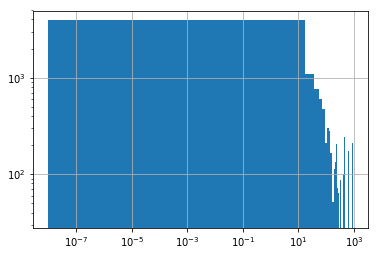

In [59]:
# We plot  the hectarias of burnt area,  in loglog scale in order to see a power-law slope
fig, ax = plt.subplots()
data["area_ha"].hist(ax=ax, bins = 50)
ax.set_yscale('log')
ax.set_xscale("log")

In [60]:
final_data.columns

Index(['area_ha', 'crops_d', 'dem', 'fire_index', 'is_veg_0', 'is_veg_1',
       'is_veg_2', 'is_veg_3', 'is_veg_4', 'is_veg_5', 'is_veg_6', 'is_veg_7',
       'park', 'point_index', 'roads_d', 'slope', 'stagione', 'tracks_d',
       'urban_d', 'veg_agg', 'x', 'y'],
      dtype='object')

In [61]:
final_data  =  final_data.drop(["fire_index","point_index", "veg_agg", "stagione"], axis=1)

final_data.columns

Index(['area_ha', 'crops_d', 'dem', 'is_veg_0', 'is_veg_1', 'is_veg_2',
       'is_veg_3', 'is_veg_4', 'is_veg_5', 'is_veg_6', 'is_veg_7', 'park',
       'roads_d', 'slope', 'tracks_d', 'urban_d', 'x', 'y'],
      dtype='object')

Decision tree has 3189 nodes with maximum depth 24.


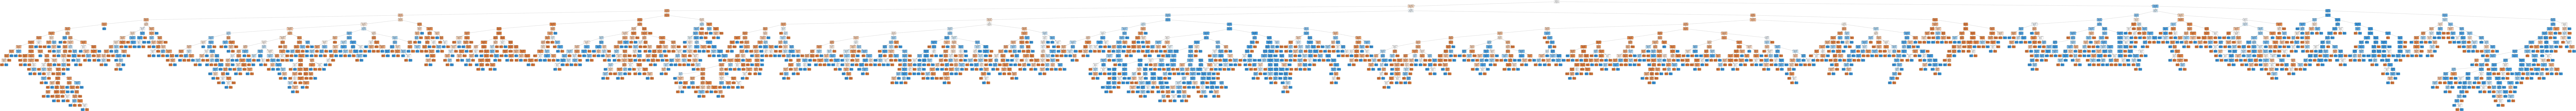

In [63]:
from sklearn.tree import DecisionTreeClassifier
RSEED  = 500
tree = DecisionTreeClassifier(random_state=RSEED)
features = list(final_data.columns[:-1])
features


from sklearn.model_selection import train_test_split

# Extract the labels
labels = np.array(final_data.pop('area_ha'))

# 30% examples in test data
train, test, train_labels, test_labels = train_test_split(final_data, labels, 
                                                          stratify = labels,
                                                          test_size = 0.3, 
                                                          random_state = RSEED)





#y = df["isbig"]
#X = df[features]

tree.fit(train,train_labels)

print(f'Decision tree has {tree.tree_.node_count} nodes with maximum depth {tree.tree_.max_depth}.')

from sklearn.tree import export_graphviz

# Export as dot
export_graphviz(tree, 'tree.dot', rounded = True, 
                feature_names = features, 
                class_names = ['0', '1'], filled = True)

from subprocess import call
# Convert to png
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=100']);



from IPython.display import Image
Image('tree.png')


In [64]:
def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(test_labels, [1 for _ in range(len(test_labels))])
    baseline['precision'] = precision_score(test_labels, [1 for _ in range(len(test_labels))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(test_labels, predictions)
    results['precision'] = precision_score(test_labels, predictions)
    results['roc'] = roc_auc_score(test_labels, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(train_labels, train_predictions)
    train_results['precision'] = precision_score(train_labels, train_predictions)
    train_results['roc'] = roc_auc_score(train_labels, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(test_labels, [1 for _ in range(len(test_labels))])
    model_fpr, model_tpr, _ = roc_curve(test_labels, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');

In [65]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve




In [66]:
# Make probability predictions
train_probs = tree.predict_proba(train)[:, 1]
probs = tree.predict_proba(test)[:, 1]

train_predictions = tree.predict(train)
predictions = tree.predict(test)


from collections import Counter
print(Counter(probs))
print(Counter(predictions))

print(f'Train ROC AUC Score: {roc_auc_score(train_labels, train_probs)}')
print(f'Test ROC AUC  Score: {roc_auc_score(test_labels, probs)}')



Counter({1.0: 3079, 0.0: 2921})
Counter({True: 3079, False: 2921})
Train ROC AUC Score: 1.0
Test ROC AUC  Score: 0.844004427111603


Recall Baseline: 1.0 Test: 0.86 Train: 1.0
Precision Baseline: 0.5 Test: 0.84 Train: 1.0
Roc Baseline: 0.5 Test: 0.84 Train: 1.0


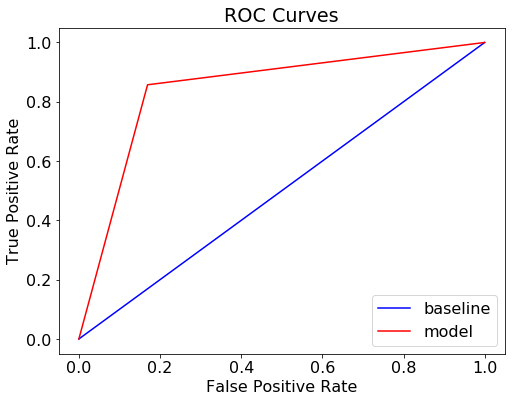

In [67]:
evaluate_model(predictions, probs, train_predictions, train_probs)

In [68]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)


Confusion matrix, without normalization
[[2493  508]
 [ 428 2571]]


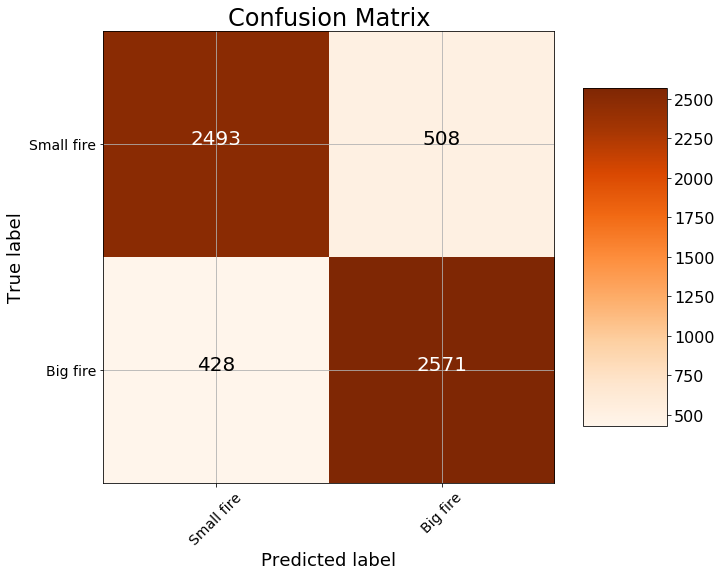

In [69]:
cm = confusion_matrix(test_labels, predictions)
plot_confusion_matrix(cm, classes = ['Small fire', 'Big fire'],
                      title = 'Confusion Matrix')

In [70]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               random_state=RSEED, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

# Fit on training data
model.fit(train, train_labels)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.0s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=500, verbose=1,
                       warm_start=False)

Average number of nodes 3292
Average maximum depth 27


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


Recall Baseline: 1.0 Test: 0.87 Train: 1.0
Precision Baseline: 0.5 Test: 0.89 Train: 1.0
Roc Baseline: 0.5 Test: 0.95 Train: 1.0


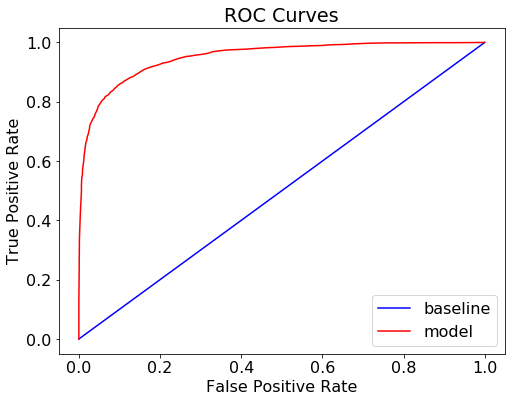

In [71]:
n_nodes = []
max_depths = []

for ind_tree in model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')




train_rf_predictions = model.predict(train)
train_rf_probs = model.predict_proba(train)[:, 1]

rf_predictions = model.predict(test)
rf_probs = model.predict_proba(test)[:, 1]

evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)


Confusion matrix, without normalization
[[2665  336]
 [ 390 2609]]


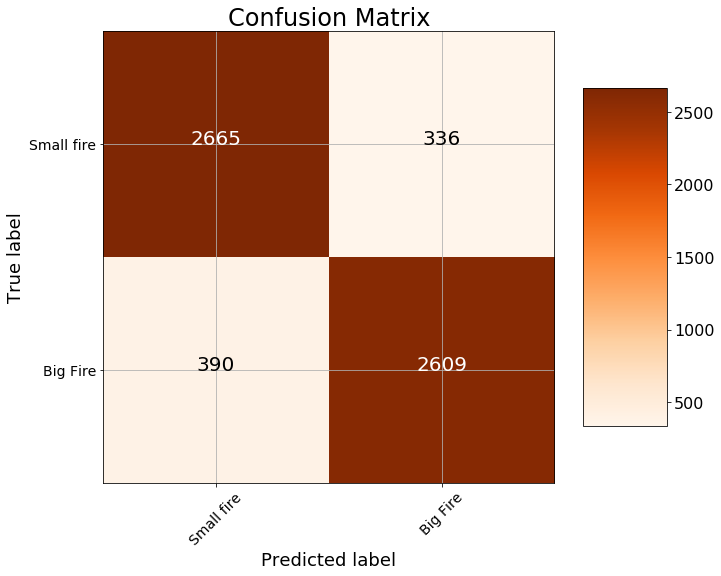

In [72]:
cm = confusion_matrix(test_labels, rf_predictions)
plot_confusion_matrix(cm, classes = ['Small fire', 'Big Fire'],
                      title = 'Confusion Matrix')



In [73]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter grid
param_grid = {
    'n_estimators': np.linspace(10, 200).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Estimator for use in random search
estimator = RandomForestClassifier(random_state = RSEED)

# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = 'roc_auc', cv = 3, 
                        n_iter = 10, verbose = 1, random_state=RSEED)

# Fit 
rs.fit(train, train_labels)



Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   20.4s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [74]:
rs.best_params_
best_model = rs.best_estimator_
train_rf_predictions = best_model.predict(train)
train_rf_probs = best_model.predict_proba(train)[:, 1]

rf_predictions = best_model.predict(test)
rf_probs = best_model.predict_proba(test)[:, 1]




Confusion matrix, without normalization
[[2547  454]
 [ 639 2360]]


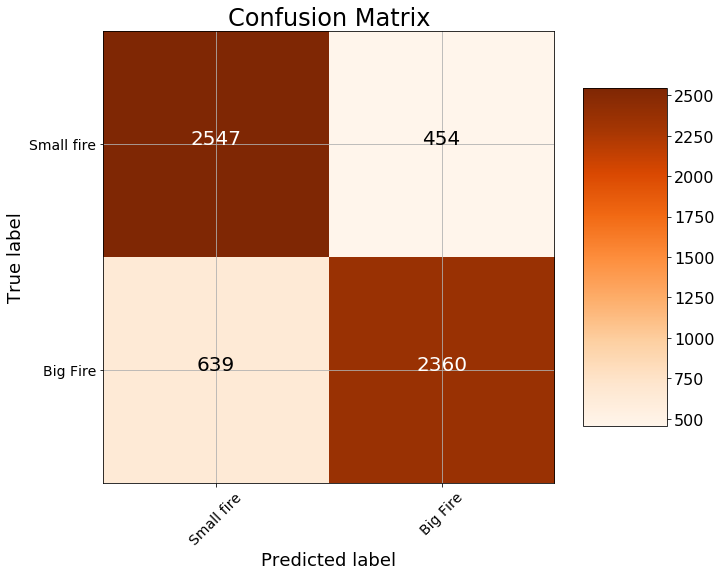

In [75]:
cm = confusion_matrix(test_labels, rf_predictions)
plot_confusion_matrix(cm, classes = ['Small fire', 'Big Fire'],
                      title = 'Confusion Matrix')


In [76]:
n_nodes = []
max_depths = []

for ind_tree in best_model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')



Average number of nodes 83
Average maximum depth 9


Recall Baseline: 1.0 Test: 0.79 Train: 0.8
Precision Baseline: 0.5 Test: 0.84 Train: 0.86
Roc Baseline: 0.5 Test: 0.9 Train: 0.91


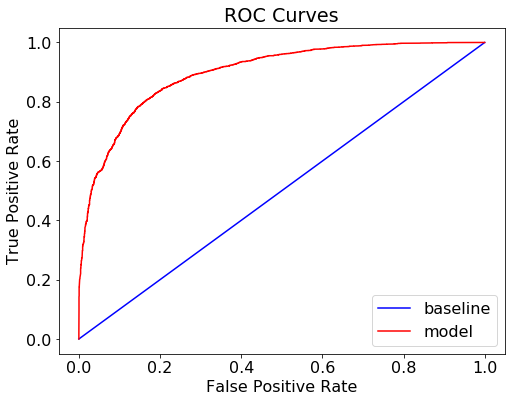

In [77]:
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)


In [78]:
estimator = best_model.estimators_[1]

# Export a tree from the forest
export_graphviz(estimator, 'tree_from_optimized_forest.dot', rounded = True, 
                feature_names=train.columns, max_depth = 8, 
                class_names = ['small_fires', 'big_fires'], filled = True)

In [ ]:
call(['dot', '-Tpng', 'tree_from_optimized_forest.dot', '-o', 'tree_from_optimized_forest.png', '-Gdpi=200'])
Image('tree_from_optimized_forest.png')